In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [2]:
mtg_rna = h5py.File('../AD_data/SEA_AD/MTG/RNAseq/SEAAD_MTG_RNAseq_final-nuclei.2023-05-05.h5ad')
gene_id = mtg_rna.get('var').get('gene_ids')
gene_id = pd.DataFrame(data=gene_id,columns=['gids'])
gene_id=gene_id.iloc[:,0].apply(lambda s: s.decode('utf-8'))
gene_id = dict(zip(gene_id.index,gene_id.iloc[:]))

In [3]:
de_alcohol = pd.read_csv('../results/human_alcohol_brenner_et_al/de_gene.tsv',sep='\t')
de_alcohol = de_alcohol[de_alcohol['p_val_adj']<=0.05]
de_X_seaad_seurat = pd.read_csv('../results/SEA_AD/X_de_genes_seurat.tsv',sep='\t')
de_X_seaad_seurat = de_X_seaad_seurat.rename(index=gene_id)

In [4]:
de_X_seaad_seurat

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
ISG15,0.000000e+00,-0.690570,0.064,0.488,0.000000e+00
AL645608.5,0.000000e+00,-0.298703,0.121,0.338,0.000000e+00
CCNL2,0.000000e+00,-0.280133,0.098,0.305,0.000000e+00
SSU72,0.000000e+00,-0.307435,0.199,0.435,0.000000e+00
AL391845.1,0.000000e+00,-0.281991,0.245,0.434,0.000000e+00
...,...,...,...,...,...
ZIC5,5.133842e-260,0.327186,0.104,0.072,1.879038e-255
AC098679.5,4.824967e-242,0.263220,0.250,0.207,1.765986e-237
AL137071.1,5.131745e-157,0.311215,0.358,0.336,1.878270e-152
CCL26,1.964698e-152,0.274890,0.343,0.325,7.190991e-148


In [5]:
de_alcohol

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
BCYRN1,0.000000e+00,1.372427,0.406,0.198,0.000000
KCNIP4,0.000000e+00,0.810414,0.611,0.392,0.000000
CSMD1,0.000000e+00,0.656643,0.518,0.348,0.000000
MALAT1,0.000000e+00,0.628079,0.963,0.910,0.000000
CALM1,0.000000e+00,-0.797154,0.424,0.566,0.000000
...,...,...,...,...,...
RUNDC3A,2.084896e-07,-0.403184,0.096,0.108,0.006813
MGST3,4.000097e-07,-0.597938,0.135,0.145,0.013071
STMN3,5.947212e-07,-0.439224,0.119,0.130,0.019434
RPL11,1.259287e-06,-0.277823,0.098,0.110,0.041150


In [6]:
set(de_X_seaad_seurat.index).intersection(de_alcohol.index)

{'ADGRB3',
 'CCDC88A',
 'CELF2',
 'CENPC',
 'DGKB',
 'DSE',
 'FOCAD',
 'FTX',
 'GOLGA8B',
 'GRM5',
 'JAKMIP2',
 'KLHL32',
 'LINC00882',
 'MAPK10',
 'MCTP1',
 'MT-CO1',
 'MT-CO2',
 'MT-ND2',
 'MT-ND4',
 'MT-ND4L',
 'MT-ND5',
 'NAT8L',
 'NEGR1',
 'NMD3',
 'PKD2',
 'PREPL',
 'PTPN13',
 'RTN4',
 'TENM3',
 'TMEM59L',
 'TSPYL1',
 'UTY',
 'WDPCP',
 'YWHAG'}

In [7]:
len(set(de_X_seaad_seurat.index).intersection(de_alcohol.index))

34

In [9]:
de_alcohol.avg_log2FC[['ADGRB3',
 'CCDC88A',
 'CELF2',
 'CENPC',
 'DGKB',
 'DSE',
 'FOCAD',
 'FTX',
 'GOLGA8B',
 'GRM5',
 'JAKMIP2',
 'KLHL32',
 'LINC00882',
 'MAPK10',
 'MCTP1',
 'MT-CO1',
 'MT-CO2',
 'MT-ND2',
 'MT-ND4',
 'MT-ND4L',
 'MT-ND5',
 'NAT8L',
 'NEGR1',
 'NMD3',
 'PKD2',
 'PREPL',
 'PTPN13',
 'RTN4',
 'TENM3',
 'TMEM59L',
 'TSPYL1',
 'UTY',
 'WDPCP',
 'YWHAG']]

ADGRB3       0.556257
CCDC88A      0.417542
CELF2        0.356912
CENPC        0.251220
DGKB         0.445658
DSE         -0.607037
FOCAD        0.331036
FTX          0.545998
GOLGA8B      0.384151
GRM5         0.437810
JAKMIP2      0.275867
KLHL32       0.270251
LINC00882    0.289869
MAPK10       0.352528
MCTP1        0.432891
MT-CO1      -1.116570
MT-CO2      -0.519835
MT-ND2      -0.328489
MT-ND4      -0.341285
MT-ND4L     -0.262792
MT-ND5      -0.384148
NAT8L       -0.487201
NEGR1        0.399190
NMD3         0.313959
PKD2         0.250760
PREPL       -0.522309
PTPN13       0.315361
RTN4        -0.957099
TENM3        0.275196
TMEM59L     -0.653707
TSPYL1      -0.635958
UTY          0.302157
WDPCP        0.385987
YWHAG       -0.681051
Name: avg_log2FC, dtype: float64

In [10]:
de_X_seaad_seurat.avg_log2FC[['ADGRB3',
 'CCDC88A',
 'CELF2',
 'CENPC',
 'DGKB',
 'DSE',
 'FOCAD',
 'FTX',
 'GOLGA8B',
 'GRM5',
 'JAKMIP2',
 'KLHL32',
 'LINC00882',
 'MAPK10',
 'MCTP1',
 'MT-CO1',
 'MT-CO2',
 'MT-ND2',
 'MT-ND4',
 'MT-ND4L',
 'MT-ND5',
 'NAT8L',
 'NEGR1',
 'NMD3',
 'PKD2',
 'PREPL',
 'PTPN13',
 'RTN4',
 'TENM3',
 'TMEM59L',
 'TSPYL1',
 'UTY',
 'WDPCP',
 'YWHAG']]

ADGRB3      -0.843107
CCDC88A     -0.289330
CELF2       -0.266999
CENPC        0.294169
DGKB        -0.304313
DSE          0.299878
FOCAD        0.263234
FTX          1.373039
GOLGA8B     -0.378310
GRM5        -0.332278
JAKMIP2     -0.506787
KLHL32      -0.253569
LINC00882    0.343344
MAPK10       0.562190
MCTP1       -0.271125
MT-CO1       1.101741
MT-CO2       0.470123
MT-ND2       1.040422
MT-ND4       0.816883
MT-ND4L      1.301717
MT-ND5       0.934698
NAT8L       -0.317417
NEGR1       -0.309196
NMD3        -0.286379
PKD2         0.377039
PREPL       -0.263295
PTPN13      -0.761423
RTN4        -0.610527
TENM3       -0.388695
TMEM59L     -0.644065
TSPYL1       0.341480
UTY         -0.295790
WDPCP       -0.256631
YWHAG        0.367023
Name: avg_log2FC, dtype: float64

## Cell-type specfic DE genes

In [5]:
de_mtg_astro = pd.read_csv('../results/SEA_AD/MTG/de_genes_ref_br6_astrocytes.tsv',sep='\t')
de_mtg_astro = de_mtg_astro.rename(index=gene_id)
de_mtg_astro = de_mtg_astro[de_mtg_astro['p_val_adj']<=0.05]
de_mtg_astro

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
ISG15,0.000000e+00,-1.049978,0.054,0.369,0.000000
AL139246.5,0.000000e+00,-0.923788,0.043,0.275,0.000000
MEF2D,0.000000e+00,-0.626327,0.825,0.961,0.000000
ITPKB-IT1,0.000000e+00,0.790184,0.976,0.704,0.000000
AC068725.1,0.000000e+00,-0.343323,0.991,1.000,0.000000
...,...,...,...,...,...
PPP5C,2.680043e-07,-0.270554,0.173,0.193,0.009809
GCFC2,2.744903e-07,-0.261601,0.214,0.230,0.010047
ROPN1,2.874306e-07,-0.268469,0.342,0.334,0.010520
RAB6A,1.012554e-06,-0.259146,0.288,0.289,0.037061


In [6]:
de_mtg_micro = pd.read_csv('../results/SEA_AD/MTG/de_genes_ref_br6_microglia.tsv',sep='\t')
de_mtg_micro = de_mtg_micro.rename(index=gene_id)
de_mtg_micro = de_mtg_micro[de_mtg_micro['p_val_adj']<=0.05]
de_mtg_micro

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
DPYD-AS1,0.000000,2.037684,0.860,0.100,0.000000
IKBKE,0.000000,-0.543425,0.955,0.978,0.000000
IGSF10,0.000000,-1.217079,0.631,0.886,0.000000
AC084871.1,0.000000,1.977557,0.793,0.063,0.000000
MEF2C-AS1,0.000000,-0.691912,0.954,0.987,0.000000
...,...,...,...,...,...
GPC2,0.000001,-0.640262,0.213,0.234,0.040008
CDC42SE1,0.000001,-0.560621,0.115,0.151,0.041985
AC004551.1,0.000001,-0.552568,0.125,0.161,0.044250
RNF222,0.000001,-0.612056,0.268,0.275,0.049421


## Cell type specific DE genes from Brenner et al paper
### 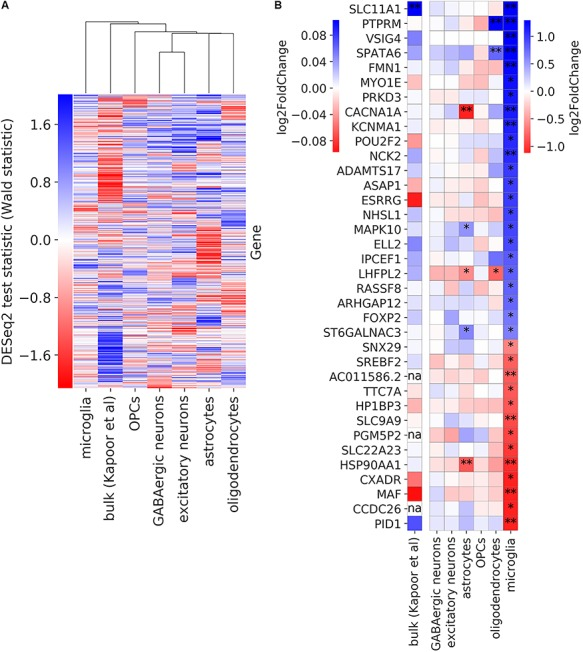

## Make into a list from fig above

In [7]:
de_alcohol_paper = ['SLC11A1', 'PTPRM', 'VSIG4', 'SPATA6', 'FMN1', 'MYO1E', 'PRKD3', 'CACNA1A', 'KCNMA1', 'POU2F2',
                   'NCK2', 'ADAMTS17', 'ASAP1', 'ESRRG', 'NHSL1', 'MAPK10', 'ELL2', 'IPCEF1', 'LHFPL2', 'RASSF8',
                   'ARHGAP12', 'FOXP2', 'ST6GALNAC3', 'SNX29', 'SREBF2', 'AC011586.2', 'TTC7A', 'HP1BP3', 'SLC9A9',
                   'PGM5P2', 'SLC22A23', 'HSP90AA1', 'CXADR', 'MAF', 'CCDC26', 'PID1']

In [8]:
set(de_alcohol_paper).intersection(de_mtg_astro.index)

{'MAPK10', 'RASSF8', 'SLC22A23'}

In [9]:
set(de_alcohol_paper).intersection(de_mtg_micro.index)

{'AC011586.2', 'HSP90AA1', 'IPCEF1', 'MAPK10', 'VSIG4'}

In [10]:
de_mtg_astro.avg_log2FC[['MAPK10', 'RASSF8', 'SLC22A23']]

MAPK10     -0.435908
RASSF8     -0.472578
SLC22A23    0.399711
Name: avg_log2FC, dtype: float64

In [11]:
de_mtg_micro.avg_log2FC[['AC011586.2', 'HSP90AA1', 'IPCEF1', 'MAPK10', 'VSIG4']]

AC011586.2    0.576263
HSP90AA1      0.271711
IPCEF1       -0.755199
MAPK10       -0.378089
VSIG4        -0.537096
Name: avg_log2FC, dtype: float64